In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

import os

In [3]:
PATH = Path('data')

In [4]:
#!kaggle datasets download -d sneakers -p {PATH}

100%|█████████████████████████████████████▉| 8.44G/8.46G [03:11<00:00, 44.5MB/s]
100%|██████████████████████████████████████| 8.46G/8.46G [03:11<00:00, 47.4MB/s]


In [7]:
#!7z x sneakers.zip -o{PATH}


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 9089165084 bytes (8669 MiB)

Extracting archive: sneakers.zip
  7% 4096 Op            --
Path = sneakers.zip
Type = zip
Physical Size = 9089165084
64-bit = +



      0% 1        0% 455 - sneaker_dataset/images/train/AS . onnie Fieg ""Mint Leaf"""/36.jp                                                                              1% 685 - sneaker_dataset/images/train/Air Fear Of God 1 Black/25.j                                                                      1% 895 - sneaker_dataset/images/train/Air Fear Of God 1 Yellow/24.jp                                                                        1% 1071 - sneaker_dataset/images/train . Moccasin Pure Platinum/62.j                                                                        2% 1201 - sneaker_dataset/images/train/Air Fear of God Raid Light Bone/54.jp                                                                                2% 1366 - sneaker_dataset/images/train/Ai . site One Albino Snakeskin/66.j                                                                              2% 1561 - sneaker_dataset/images/train/Air Foamposite One Navy Gum/28.jp                                  

                                                           59% 32754 - sneaker_dataset/images/train/Kobe 1 Protro 81 Pt Game/10.jp                                                                         59% 32945 - sneaker_dataset/images/train/Kobe 4 Protro Carpe Diem/17.jp                                                                         60% 33169 - sneaker_dataset/images/train/Kyrie 4 Confetti/18.jp                                                                 60% 33328 - sneaker_dataset/images/train/Kyrie 5 Bandulu/28.j                                                               60% 33495 - sneaker_dataset/images/train/Kyrie 5 Friends/21.j                                                               61% 33671 - sneaker_dataset/images/train/Kyrie 5 Taco PE/4.jp                                                               61% 33833 - sneaker_dataset/images/train/Le . erformance KITH Rose Gold/29.jp                                                                           

                                                                     78% 42953 - sneaker_dataset/images/train/S . 0 Politics Cafe Du Monde/39.jp                                                                             78% 43145 - sneaker_dataset/images/train/Vans Era 95 Fear of God/1.jp                                                                       79% 43371 - sneaker_dataset/images/train/Vans Old Skool Flame (2017)/48.j                                                                           79% 43612 - sneaker_dataset/images/train . eme Black Checker Logo/0.j                                                                       79% 437         80% 43846 - sneaker_dataset/images/train/adidas 3D Runner Black/7.j                                                                     80% 44006 - sneaker_dataset/images/train . m Runner 4D Mid White/10.j                                                                       80% 44216 - sneaker_dataset/images/train/ad . 7 Ultra Boos

                                                                         96% 52979 - sneaker_dataset/images/train/ . eezy Boost 350 V2 Synth/31.jp                                                                           96% 53142 - sneaker_dataset/images/train/ . eezy Boost 350 V2 Zebra/36.jp                                                                           97% 53306 - sneaker_dataset/images/train/adidas Yeezy Boost 700 Inertia/29.jp                                                                               97% 53462 - sneaker_dataset/images/train/ad . y Boost 700 Utility Black/21.jp                                                                               97% 53623 - sneaker_dataset/images/train/a . ezy Boost 700 V2 Tephra/23.j                                                                           98% 53730 - sneaker_dataset/images/train/ . eezy Boost 700 V2 Vanta/55.jp                                                                           98% 53920 - sneaker_da

In [4]:
PATH.ls()

[PosixPath('data/sneaker_dataset'), PosixPath('data/.ipynb_checkpoints')]

In [5]:
img_path = Path(PATH/'sneaker_dataset/images/train')

In [6]:
classes = [dI for dI in os.listdir('/home/jupyter/projects/sneaker_classification/data/sneaker_dataset/images/train') if os.path.isdir(os.path.join('/home/jupyter/projects/sneaker_classification/data/sneaker_dataset/images/train',dI))]

In [7]:
classes[:5]

['adidas Yeezy Boost 700 V2 Vanta',
 'Nike Zoom Freak 1 Antetokounbros',
 'adidas NMD R1 White Gum (2018)',
 'Kobe 1 Protro Purple Reign',
 'Jordan 6 Retro White Laser Fuchsia Green Abyss (GS)']

In [8]:
np.random.seed(42)
src = (ImageList.from_folder(img_path)
       .split_by_rand_pct(0.2)
       .label_from_folder())

In [9]:
tfms = get_transforms()

In [10]:
data = (src.transform(tfms, size=128)
        .databunch()
        .normalize(imagenet_stats))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['A Bathing Ape Bapesta Kanye West College Dropout',
  'A Bathing Ape Bapesta Ronnie Fieg Fiegsta Sand',
  'ACE 16 PureControl Ultra Boost Kith Flamingos',
  'ASICS GT-II Ronnie Fieg ""High Risk"""',
  'ASICS Gel-Lyte III Afew ""Koi"""',
  'ASICS Gel-Lyte III Hanon ""Wildcats"""',
  'ASICS Gel-Lyte III Ronnie Fieg ""Flamingo"""',
  'ASICS Gel-Lyte III Ronnie Fieg ""Homage"" (Special Box)"',
  'ASICS Gel-Lyte III Ronnie Fieg ""Leatherbacks"""',
  'ASICS Gel-Lyte III Ronnie Fieg ""Mint Leaf"""',
  'ASICS Gel-Lyte III Ronnie Fieg ""Salmon Toes"""',
  'ASICS Gel-Lyte III Ronnie Fieg Militia (Special Box)',
  'ASICS Gel-Lyte III Ronnie Fieg Super Green',
  'ASICS Gel-Lyte III Woei ""Cervidae"""',
  'Air Fear Of God 1 Black',
  'Air Fear Of God 1 Frosted Spruce',
  'Air Fear Of God 1 Orange Pulse',
  'Air Fear Of God 1 Sail Black',
  'Air Fear Of God 1 Yellow',
  'Air Fear Of God Moccasin Black',
  'Air Fear Of God Moccasin Particle Beige',
  'Air Fear Of God Moccasin Pure Platinum',
  'Air

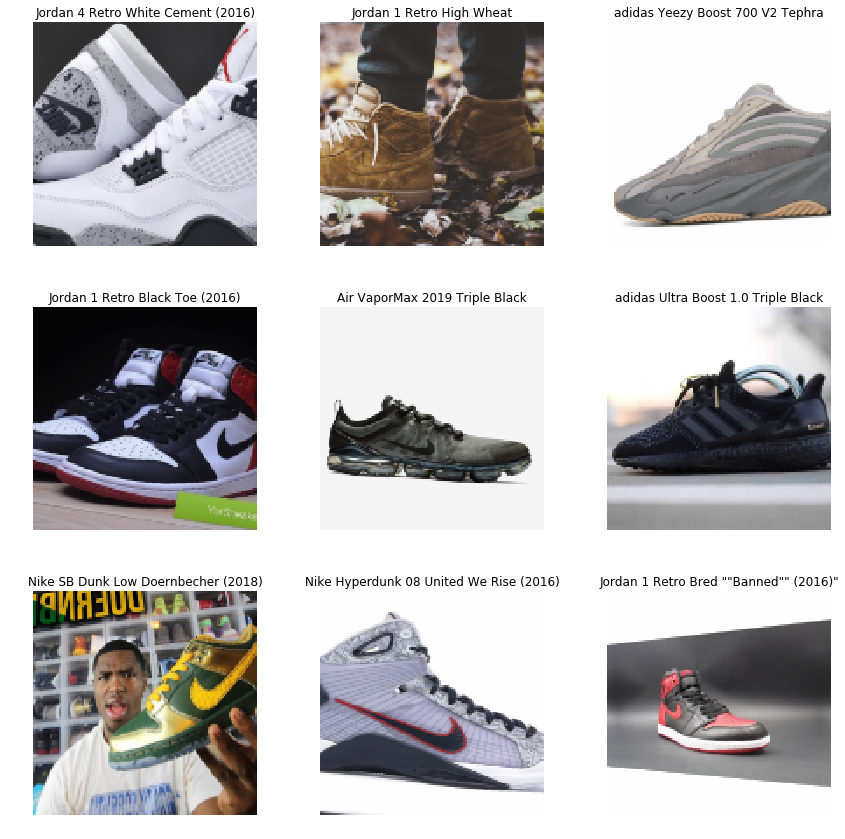

In [12]:
data.show_batch(rows=3, figsize=(12,12))

In [13]:
arch = models.resnet50

In [14]:
metrics = [accuracy, error_rate]

In [15]:
learn = cnn_learner(data, arch, metrics=metrics)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02
Min loss divided by 10: 5.75E-03


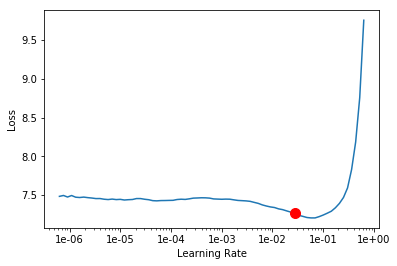

In [16]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [17]:
lr = learn.recorder.min_grad_lr

In [18]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.144085,2.540279,0.443465,0.556535,08:58
1,2.418782,1.680919,0.611127,0.388873,09:03
2,1.432854,0.909310,0.781348,0.218652,09:03
3,0.937410,0.738463,0.821534,0.178466,08:57


In [19]:
learn.save('stage-1-res50')

In [20]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 3.31E-07


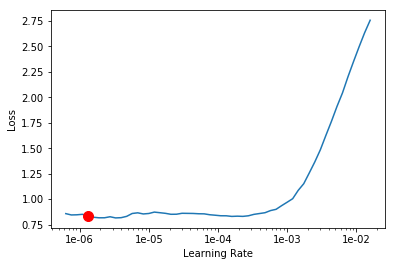

In [21]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [22]:
learn.fit_one_cycle(4, slice(1e-04, lr/10), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.466355,1.171419,0.715856,0.284144,09:00
1,1.124329,0.813104,0.802104,0.197896,09:00
2,0.754781,0.563936,0.861624,0.138376,09:08
3,0.518320,0.501872,0.878211,0.121789,09:08


Better model found at epoch 0 with accuracy value: 0.7158563137054443.
Better model found at epoch 1 with accuracy value: 0.8021040558815002.
Better model found at epoch 2 with accuracy value: 0.8616244792938232.
Better model found at epoch 3 with accuracy value: 0.8782106041908264.


In [23]:
learn.save('stage-2-res50')

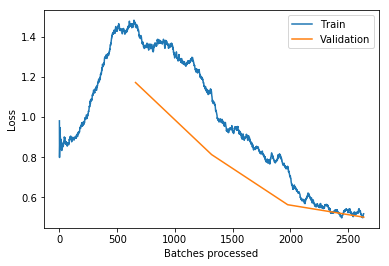

In [24]:
learn.recorder.plot_losses()

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

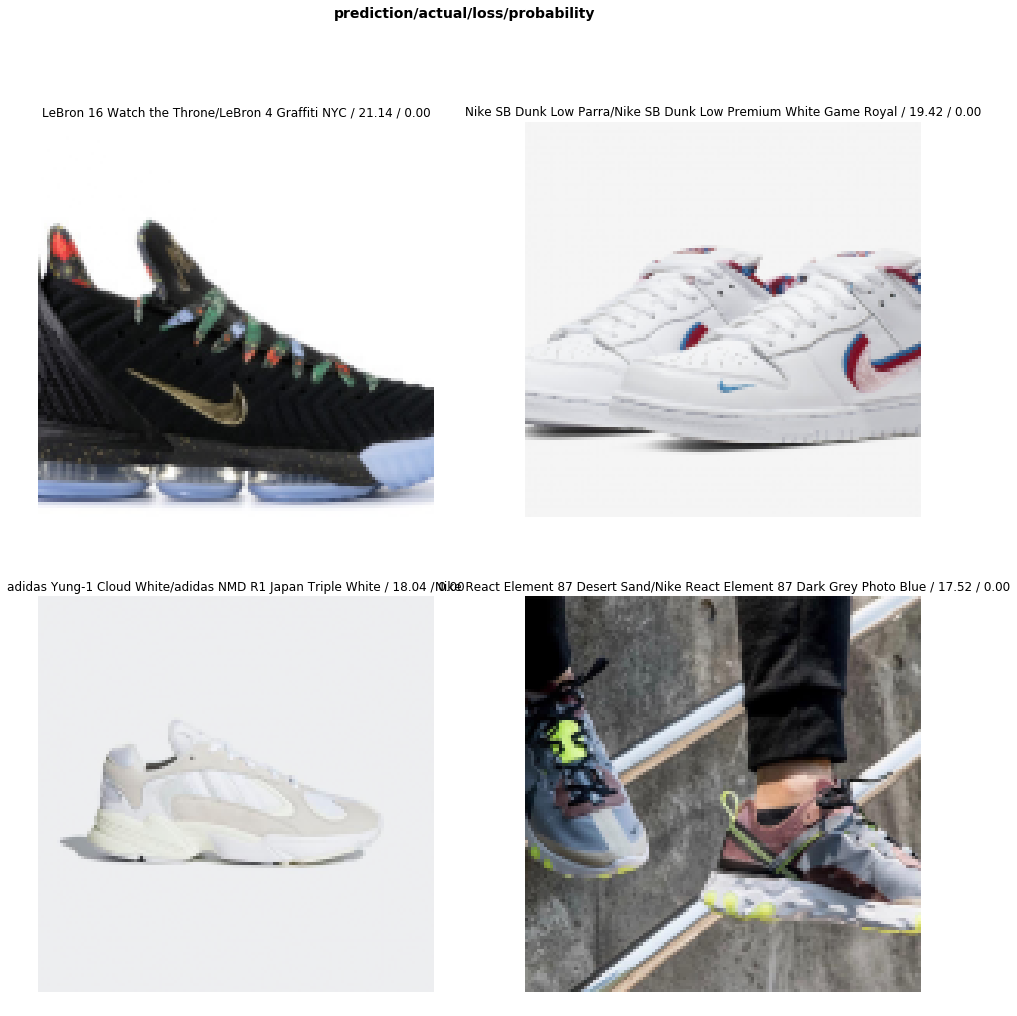

In [26]:
interp.plot_top_losses(4, figsize=(16,16), heatmap=False)

In [27]:
data = (src.transform(tfms, size=256)
        .databunch()
        .normalize(imagenet_stats))

In [28]:
learn.data = data

In [29]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-03
Min loss divided by 10: 2.29E-03


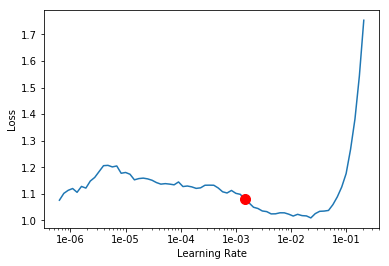

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
lr = learn.recorder.min_grad_lr

In [32]:
learn.fit_one_cycle(4, slice(lr), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.704112,0.514232,0.875936,0.124064,11:27
1,0.590398,0.453085,0.890153,0.109847,11:30
2,0.548885,0.429997,0.898114,0.101886,11:19
3,0.457173,0.428862,0.897830,0.102170,11:22


Better model found at epoch 0 with accuracy value: 0.8759359121322632.
Better model found at epoch 1 with accuracy value: 0.8901525735855103.
Better model found at epoch 2 with accuracy value: 0.8981139063835144.


In [33]:
learn.save('stage-1-res50-256')

In [34]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.45E-06


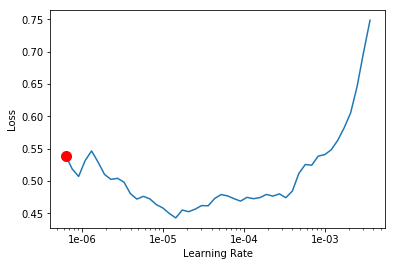

In [35]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [36]:
learn.fit_one_cycle(4, slice(3e-06, lr/10), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.462570,0.416185,0.900862,0.099138,11:39
1,0.466577,0.401901,0.904085,0.095915,11:49
2,0.409177,0.392434,0.905222,0.094778,12:06
3,0.406400,0.389939,0.906739,0.093261,12:10


Better model found at epoch 0 with accuracy value: 0.900862455368042.
Better model found at epoch 1 with accuracy value: 0.9040849208831787.
Better model found at epoch 2 with accuracy value: 0.9052222371101379.
Better model found at epoch 3 with accuracy value: 0.9067386984825134.


In [37]:
learn.save('stage-2-res50-256')

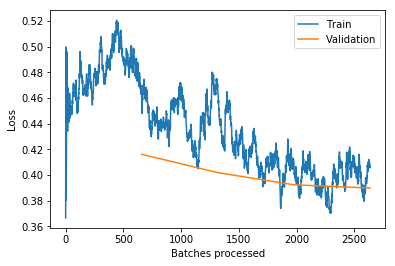

In [38]:
learn.recorder.plot_losses()

In [41]:
learn.load('stage-2-res50-256');

In [42]:
learn.fit_one_cycle(4, slice(3e-06, lr/10), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.430381,0.388017,0.906075,0.093925,12:04
1,0.384314,0.381443,0.909013,0.090987,11:56
2,0.365757,0.375073,0.910245,0.089755,12:01
3,0.339715,0.373178,0.910719,0.089281,12:02


Better model found at epoch 0 with accuracy value: 0.9060752391815186.
Better model found at epoch 1 with accuracy value: 0.9090133905410767.
Better model found at epoch 2 with accuracy value: 0.9102454781532288.
Better model found at epoch 3 with accuracy value: 0.9107193350791931.


In [43]:
learn.save('stage-3-res50-256')

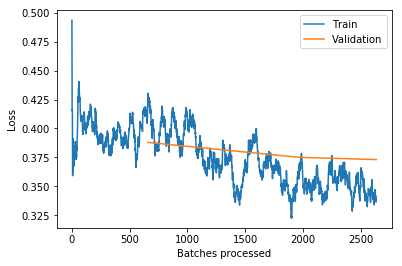

In [44]:
learn.recorder.plot_losses()

In [45]:
learn.export()